In [14]:
import pandas as pd
import numpy as np
import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
#Show max 100 columns or rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

# The Dataset
This dataset called Donacilla cornea shell size and coloration. (https://www.kaggle.com/datasets/linnaeus/donacilla-cornea-shell-size-and-coloration-ua)
Data on four populations of D. cornea from Ukrainian Black Sea beaches

This includes the length of the shell, the width of the shell, the height of the shell, the width/length ratio, the height/length ratio and more.



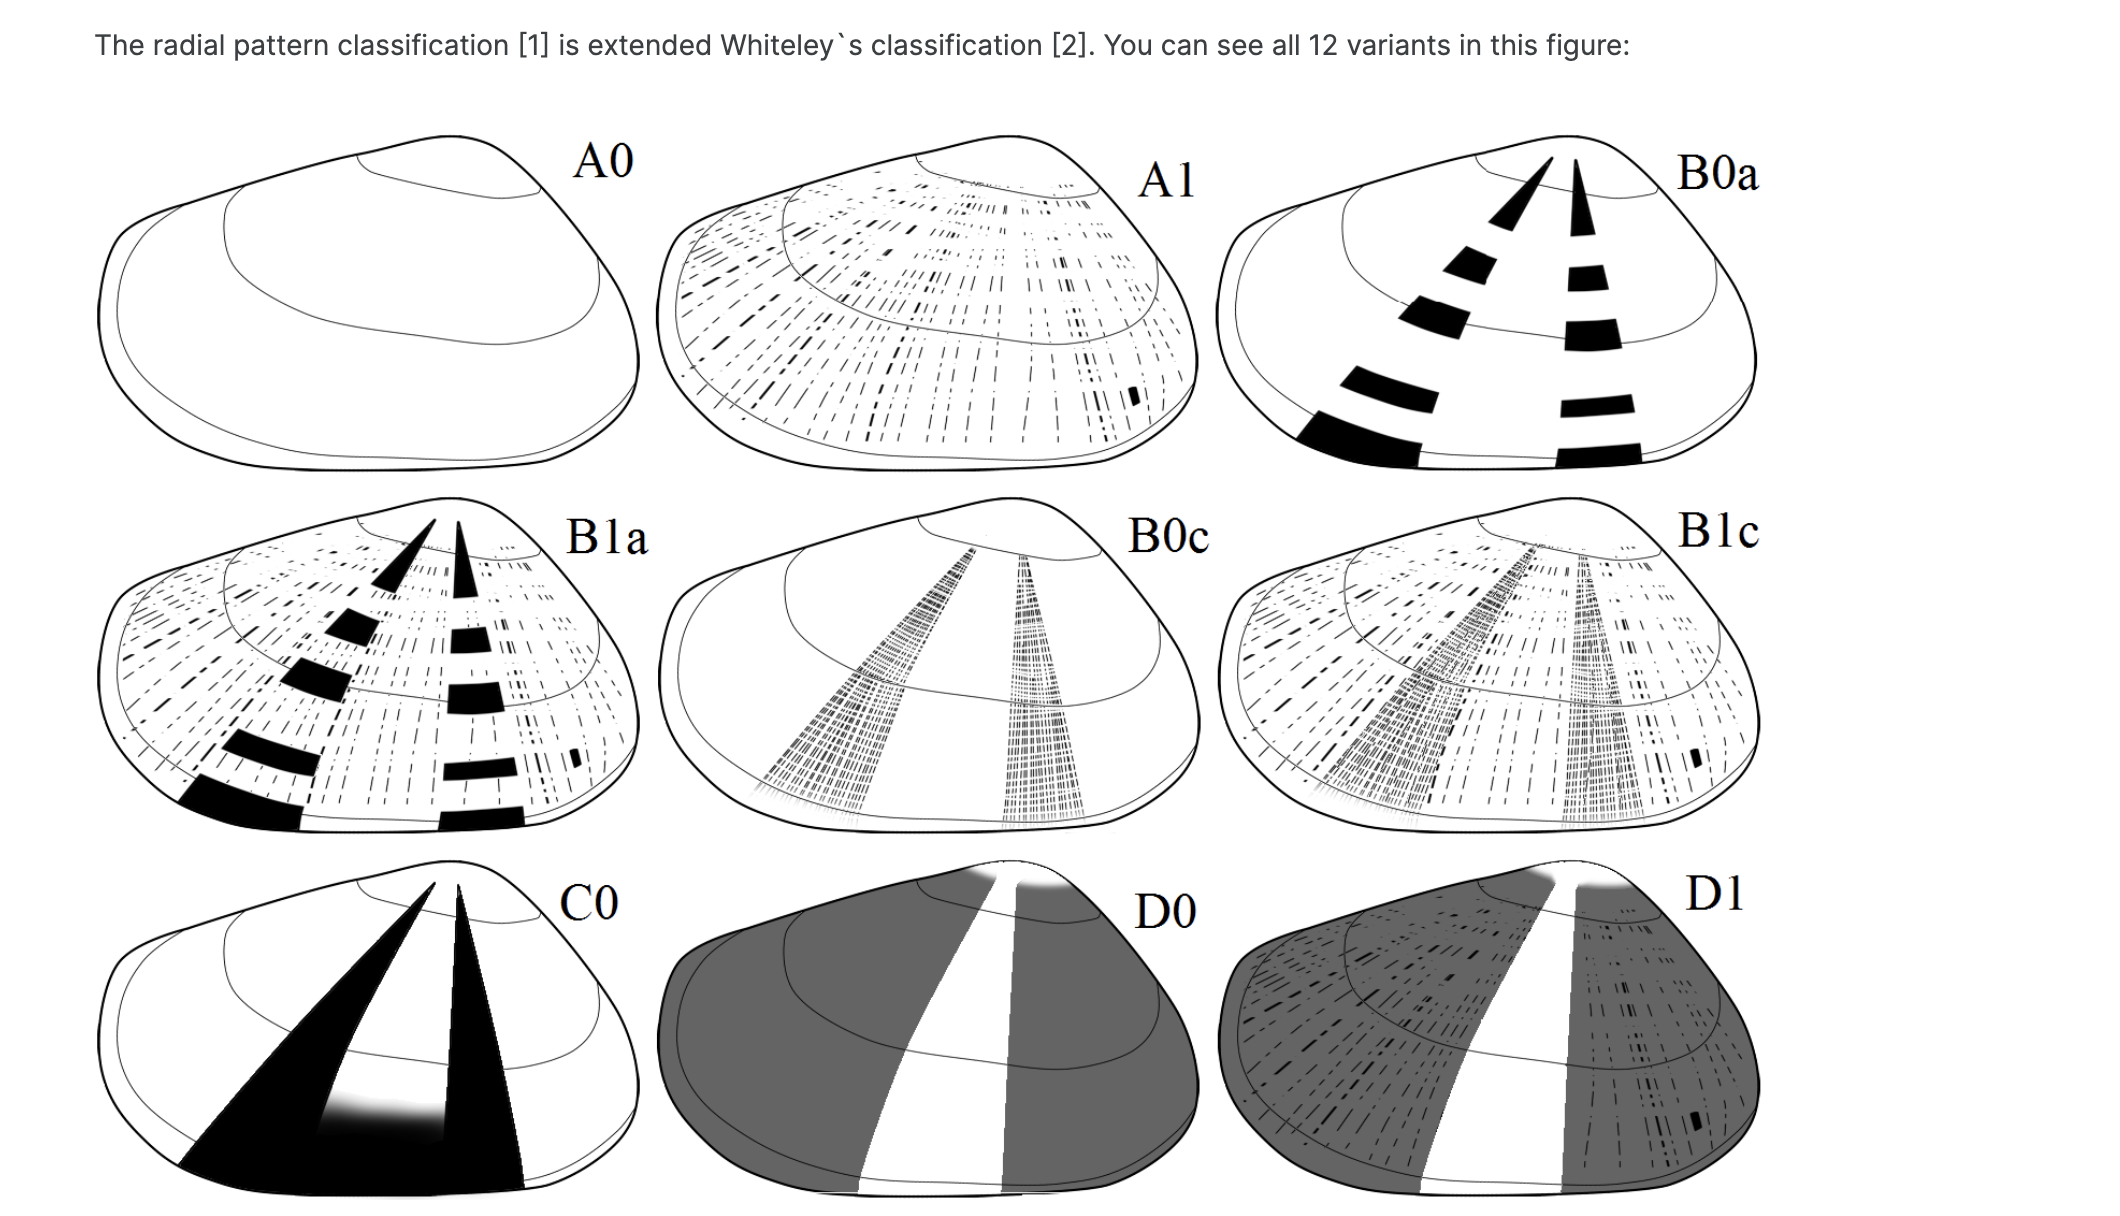

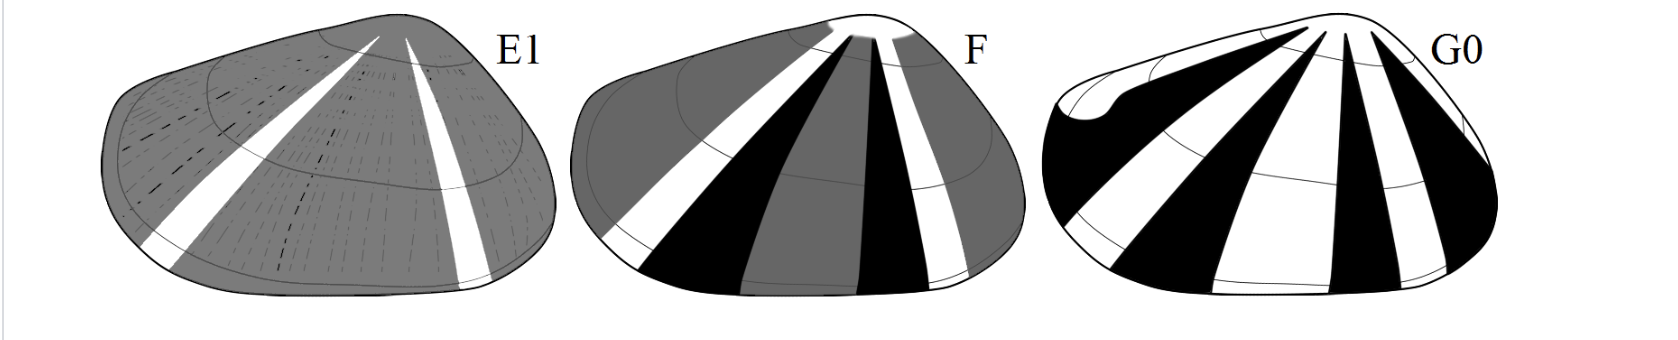

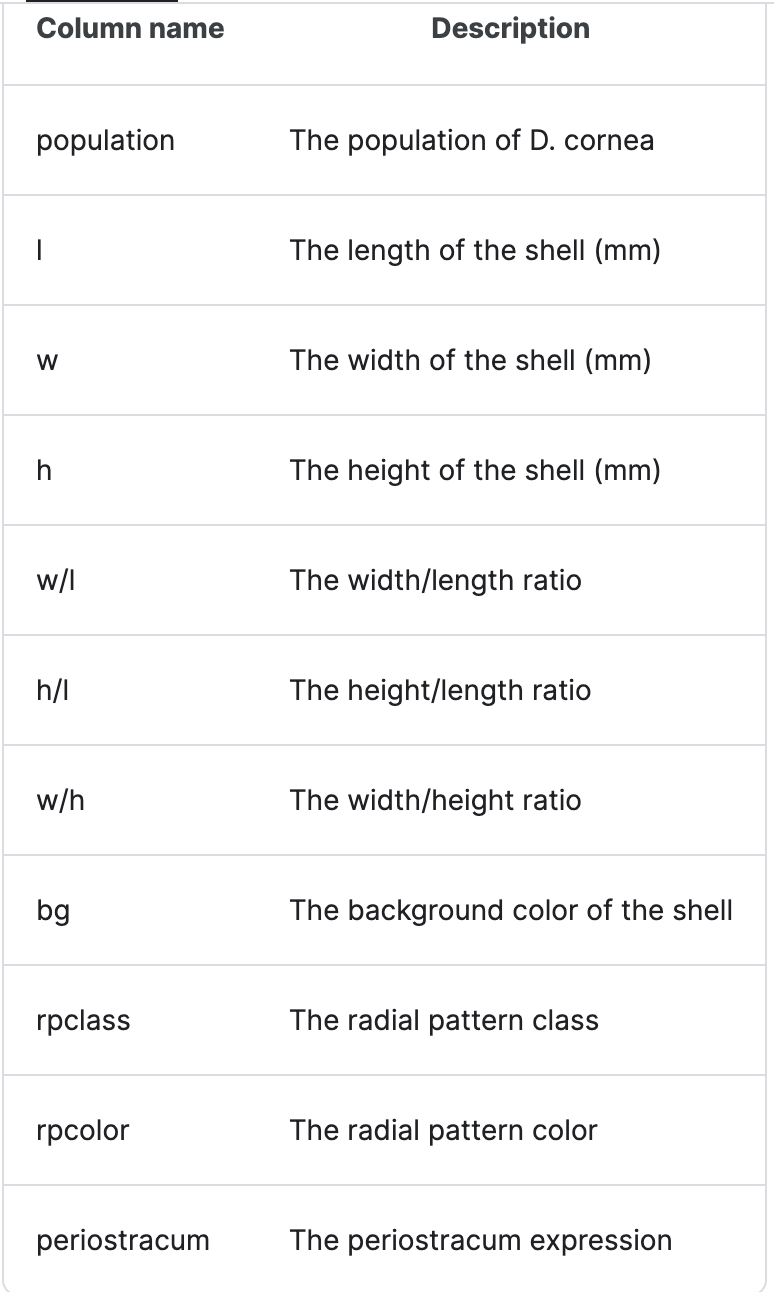

In [15]:
#Load in the CSV
df = pd.read_csv("/Users/liangminghao/Desktop/Donacilla.csv")

In [16]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Show column "l" and "w"
data = df[["l","w"]].values
x = data[:,0]
y = data[:,1]
print(x)
print(y)

[18.01 22.11 19.36 19.76 19.56 22.88 19.83 18.82 13.2  15.93 21.   20.99
 23.93 19.53 22.75 25.11 23.59 21.47 16.69 20.77 20.91 19.77 19.15 19.6
 20.15 22.12 23.07 20.   23.12 22.88 20.57 19.68 20.72 20.4  22.39 23.48
 20.53 20.03 20.93 22.33 22.01 21.89 21.92 22.83 25.   12.51 14.61 14.5
 14.59 16.5  16.4  24.05 24.63 24.07 22.83 22.08 22.29 21.22 26.05 23.15
 20.85 20.06 19.67 18.81 17.3  17.25 17.53 18.82 25.53 23.42 25.23 22.67
 22.35 24.14 22.5  22.44 21.33 23.02 22.82 19.98 20.92 19.08 21.19 20.28
 20.05 20.04 19.81 18.49 19.41 18.05 16.09 18.53 17.05 16.48 17.26 18.49
 19.15 19.25 16.28 15.13 13.5  11.88 14.1  12.23 21.   19.24 20.51 21.34
 21.76 22.53 24.14 23.56 25.24 23.63 24.22 25.22 23.69 25.64 25.04 23.95
 22.12 23.72 23.52 21.34 24.33 24.54 24.68 23.91 21.9  23.89 22.49 22.6
 16.98 20.84 22.39 22.88 21.82 22.48 24.94 21.76 23.78 22.78 20.06 22.96
 24.49 21.44 20.35 11.61 12.01 10.18  8.4   9.85  9.4  12.62 13.57  9.06
 13.93  6.27 11.53 11.36  8.64  9.38 12.86 10.47 10.51

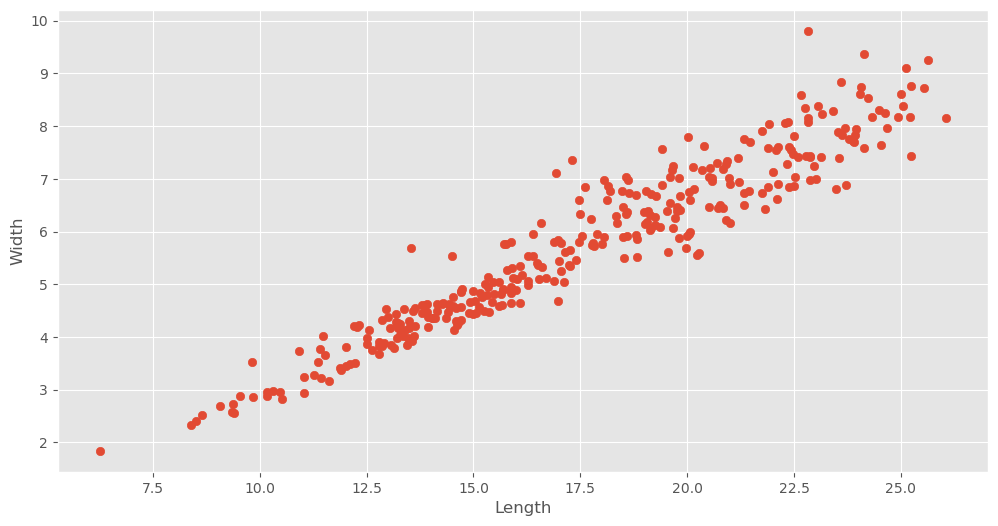

In [17]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = df[["l","w"]].values
x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Length","Width")

# df.groupby()
The function .groupby() can be called on a dataframe to collect together items based on a given column. We can then use these groups to calculate aggregate statistics (such as mean). Here we use this technique to quickly plot the mean tempo for each genre.

All full list of possible stats that can be used in conjunction with .groupby() can be found on the Pandas documentation, with this aggregate stats guide also useful.

In [18]:
grouped=df.groupby('population')

# 1.Pick two numeric variables to compare.

# Standardise
First we have to standardise the range of the dataset

In [19]:
df

,population,l,w,h,w/l,h/l,w/h,bg,rpclass,rpcolor,periostracum
0,Budakskaya spit 2017,18.01000,5.77000,10.80000,0.32040,0.59970,0.53430,white,A0,NaN,absent
1,Budakskaya spit 2017,22.11000,6.61000,12.77000,0.29900,0.57760,0.51760,white,A1,transparent,absent
2,Budakskaya spit 2017,19.36000,6.09000,12.02000,0.31460,0.62090,0.50670,white,A1,grey,absent
3,Budakskaya spit 2017,19.76000,6.46000,12.04000,0.32690,0.60930,0.53650,gray&purple,A1,black,absent
4,Budakskaya spit 2017,19.56000,5.62000,11.63000,0.28730,0.59460,0.48320,white,A0,NaN,partial
...,...,...,...,...,...,...,...,...,...,...,...
329,Sasyk 2013,14.63000,4.27000,8.60000,0.29190,0.58780,0.49650,white,D0,black,partial
330,Sasyk 2013,11.41000,3.77000,7.02000,0.33040,0.61520,0.53700,white,A0,NaN,partial
331,Sasyk 2013,12.28000,4.18000,7.53000,0.34040,0.61320,0.55510,white,A0,NaN,partial
332,Sasyk 2013,13.46000,3.98000,8.23000,0.29570,0.61140,0.48360,white,A1,black,partial


In [20]:
x = df
x_scaled = x.drop("population", axis = 1)
x_scaled = x_scaled.drop("bg", axis = 1)
x_scaled = x_scaled.drop("rpclass", axis = 1)
x_scaled = x_scaled.drop("rpcolor", axis = 1)
x_scaled = x_scaled.drop("periostracum", axis = 1)

In [21]:
x_scaled = x_scaled.dropna()

In [22]:
#Standardise
x_scaled = StandardScaler().fit_transform(x_scaled)

In [23]:
x_scaled

array([[ 0.11656501,  0.02312983,  0.01983453, -0.15284696, -0.47873519,
         0.12957913],
       [ 1.09531374,  0.55028711,  0.75925251, -0.92323617, -1.30408517,
        -0.34821982],
       [ 0.43883594,  0.22395165,  0.4777482 , -0.36164404,  0.31300325,
        -0.66007663],
       ...,
       [-1.25129601, -0.97470358, -1.20752424,  0.56714295,  0.02543787,
         0.72468202],
       [-0.96960735, -1.10021721, -0.94478688, -1.04203451, -0.0417852 ,
        -1.32098416],
       [-1.84093244, -1.38889858, -1.59787687,  1.22953368,  1.83299167,
         0.36132593]])

# Scaling
Reference: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data

In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [52]:
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns

/Users/liangminghao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liangminghao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

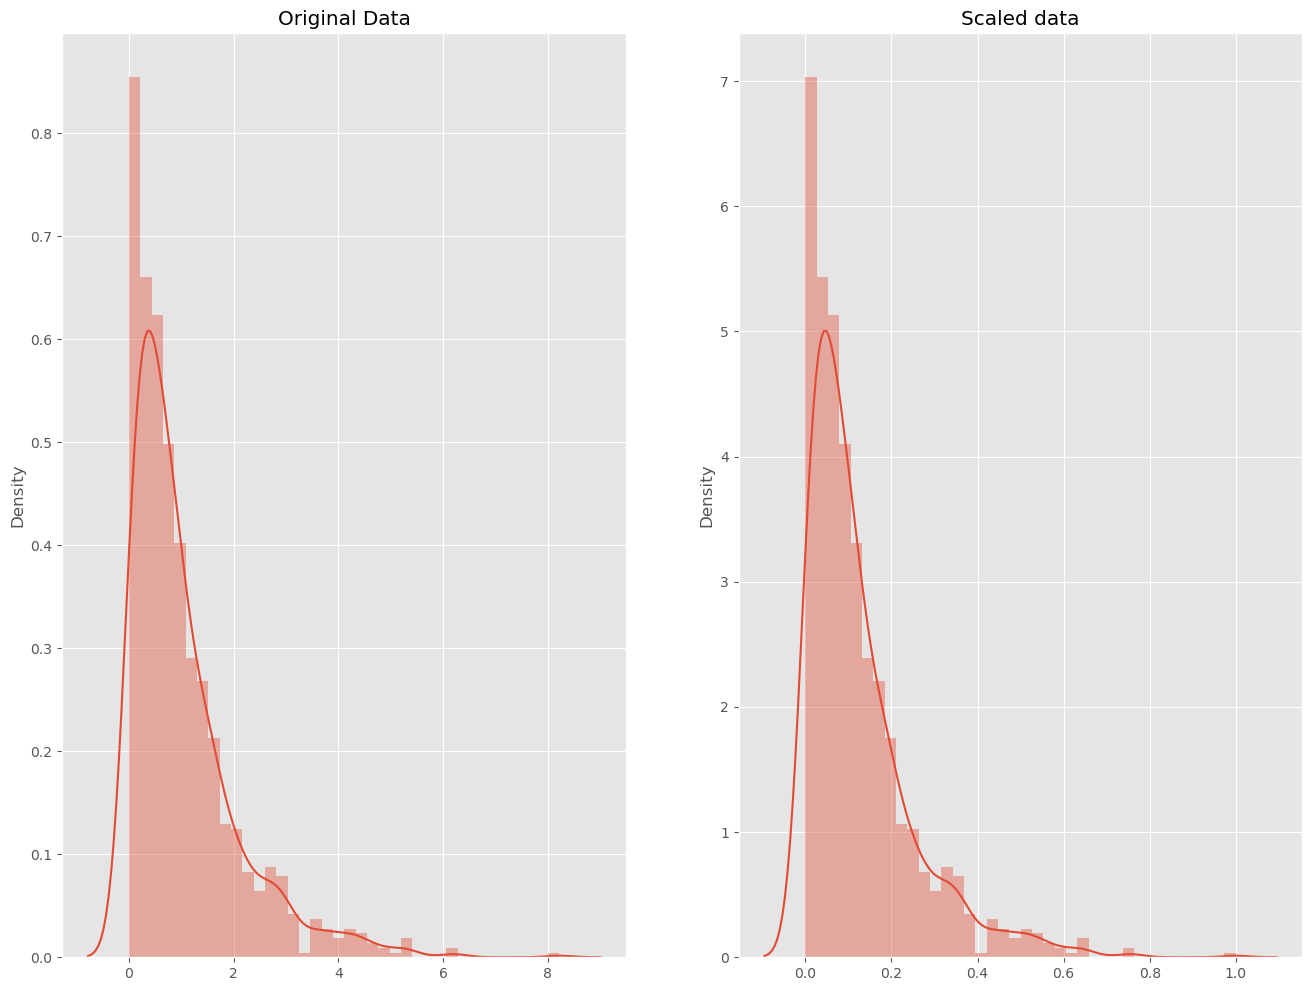

In [53]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

# Normalization
Reference：https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data

In [48]:
from scipy import stats

/Users/liangminghao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liangminghao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

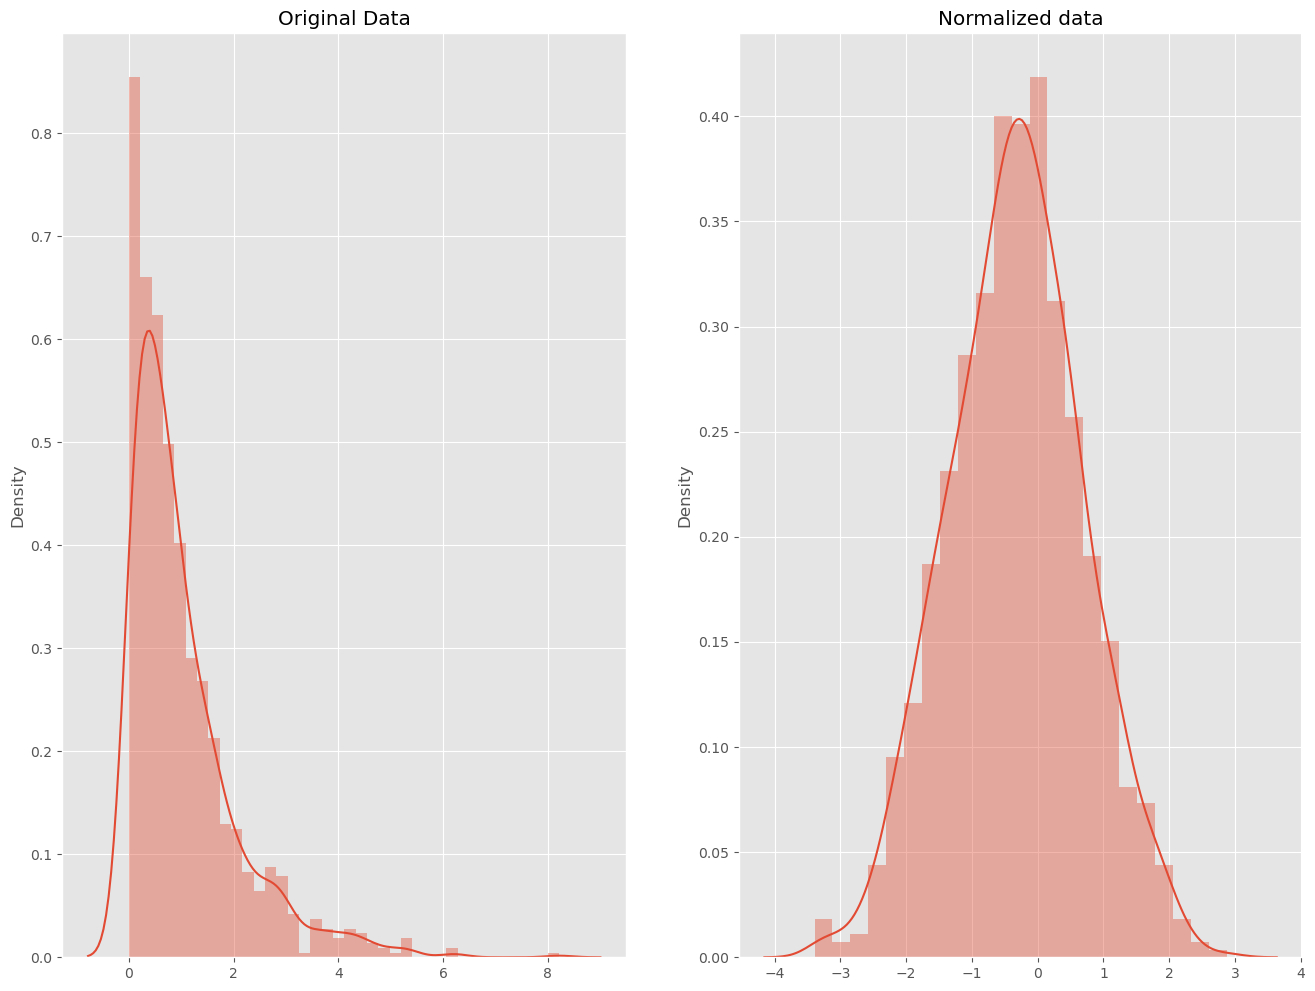

In [54]:
# normalize the exponential data with boxcox

normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

#  Means, Ranges, Distributions

# Mean
These code refer from Introduction to Data Science Week3.

In [57]:
# method1:
mean_l=np.mean(x)
mean_w=np.mean(y)
print('The mean of l is: ')
print(mean_l)
print('The mean of w is: ')
print(mean_w)

The mean of l is: 
17.521706586826348
The mean of w is: 
5.733143712574851


In [58]:
# method12:
mean_l1=df["l"].mean()
print('The mean of l is: ')
print(mean_l1)
mean_w1=df["w"].mean()
print('The mean of w is: ')
print(mean_w1)

The mean of l is: 
17.521706586826358
The mean of w is: 
5.73314371257485


# Range
The range is calculated as max-min.

These code refer from Introduction to Data Science Week3.

df.group.apply()
Since there is no range function built into Pandas for groups, we can use the apply() function to write a custom function.
Here, we write our own function which is applied to each group in turn and returns the desired calculation. After composing a function that takes subtracts the maximum tempo from the minimum tempo, we pass it as an argument to the apply() function.

In [59]:
def l_range(x):
    return x["l"].max()-x["l"].min()
# Get range from grouped items
range_l=grouped.apply(l_range).sort_values()
print('The range of l is: ')
print(range_l)

The range of l is: 
population
Grigorovka 2019         8.44000
Dzharylgach 2016        8.66000
Sasyk 2013             10.89000
Budakskaya spit 2017   14.17000
dtype: float64


In [60]:
def w_range(x):
    return x["w"].max()-x["w"].min()
# Get range from grouped items
range_w=grouped.apply(w_range).sort_values()
print('The range of w is: ')
print(range_l)

The range of w is: 
population
Grigorovka 2019         8.44000
Dzharylgach 2016        8.66000
Sasyk 2013             10.89000
Budakskaya spit 2017   14.17000
dtype: float64


# Distributions

We will have to drop the null values before doing any plotting or analysis on the data.

These code refer from Introduction to Data Science Week5.

In [61]:
l_data = df['l']
l_data = l_data.dropna()
w_data = df['w']
w_data = w_data.dropna()

Lets first plot this data as a histogram to see the shape of the data.

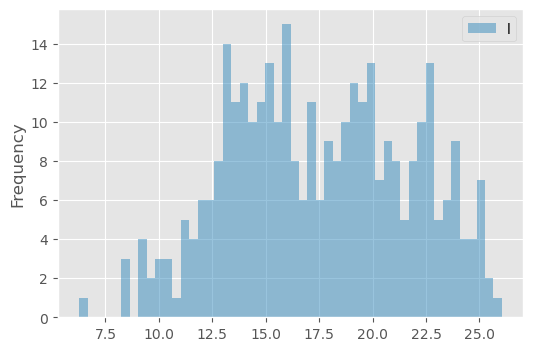

In [62]:
plt.figure(figsize=(6,4))
ax = l_data.plot(kind='hist', bins=50, density=False, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=True)

This plot shows us the length of the shell in each of the bins, as you can see the majority of the shell are between 12.5 and 25 meters tall.

This is useful, however, this doesn't really tell us much about the probability distribution of the length of the shell. If we want to see the probabilities of various length, we want to plot this as a probability density distribution. To do that we use almost the exact same code, we just want to set `density=True' this time. Now we will have a plot of probability densities that all sum to 1.

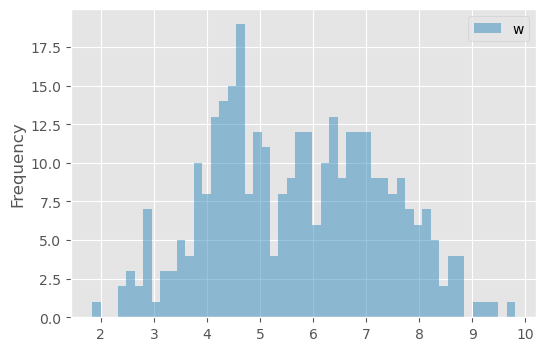

In [63]:
plt.figure(figsize=(6,4))
ax = w_data.plot(kind='hist', bins=50, density=False, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=True)

This plot shows us the width of the shell in each of the bins, as you can see the majority of the shell are between 4 and 8 meters tall.

This is useful, however, this doesn't really tell us much about the probability distribution of the width of the shell. If we want to see the probabilities of various width, we want to plot this as a probability density distribution. To do that we use almost the exact same code, we just want to set `density=True' this time. Now we will have a plot of probability densities that all sum to 1.

Text(0, 0.5, 'Density')

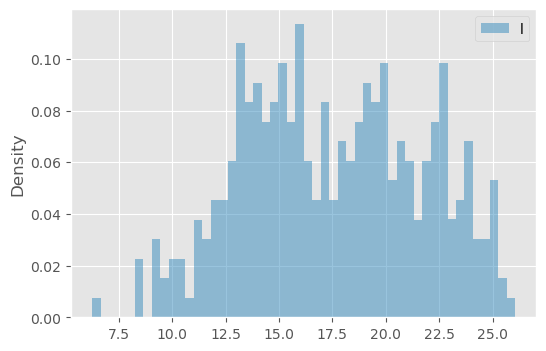

In [64]:
plt.figure(figsize=(6,4))
ax = l_data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=True)
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

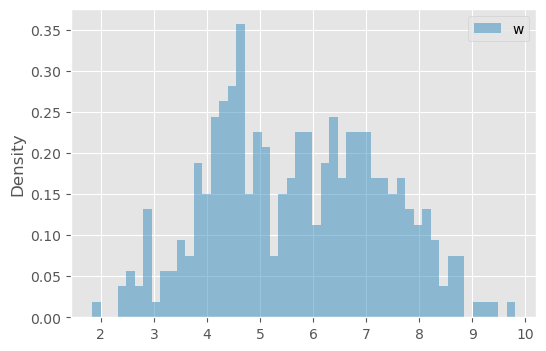

In [65]:
plt.figure(figsize=(6,4))
ax = w_data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=True)
ax.set_ylabel('Density')

Lets first try to fit a normal distribution to this data to see how we perform.

What we are going to do here is fit a probability density function (PDF) to the data. A PDF is a statistical model of our data that we can using some prior assumption about how the data is distributed.

First fun this cell for a function for calculating a pdf.

In [66]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

Lets try fitting a PDF using a Gaussian distribution.

Text(0, 0.5, 'Density')

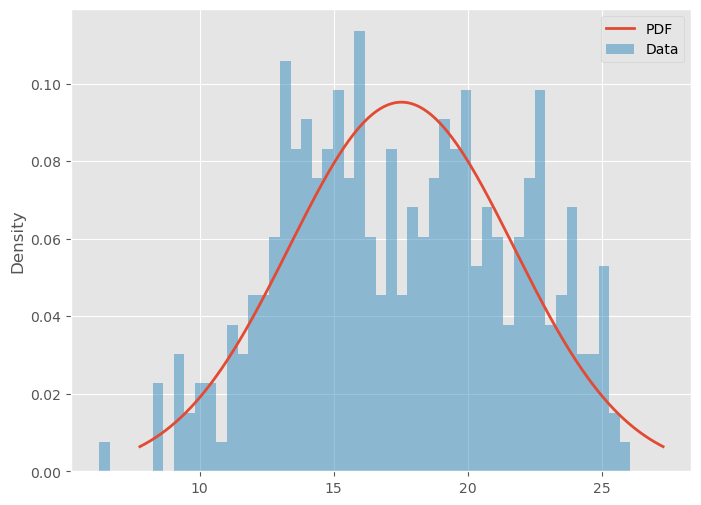

In [67]:
dist_f = st.norm
params_l = dist_f.fit(l_data)
pdf = make_pdf(dist_f, params_l)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
l_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

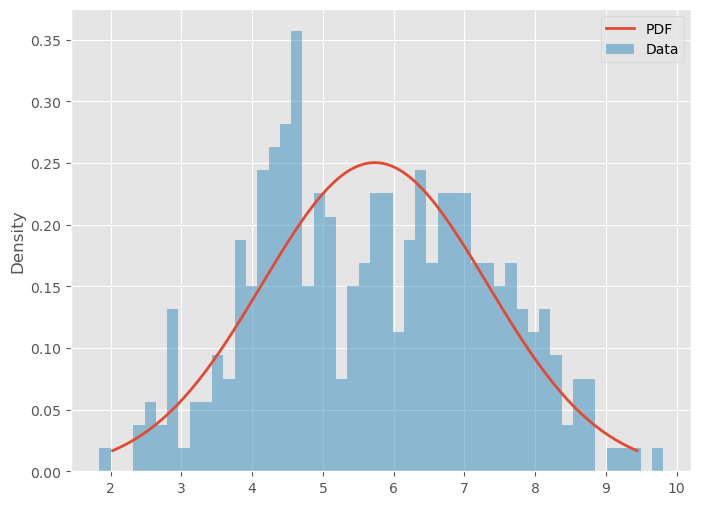

In [68]:
dist_f = st.norm
params_w = dist_f.fit(w_data)
pdf = make_pdf(dist_f, params_w)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
w_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

Lets try the exponential distribution

Text(0, 0.5, 'Density')

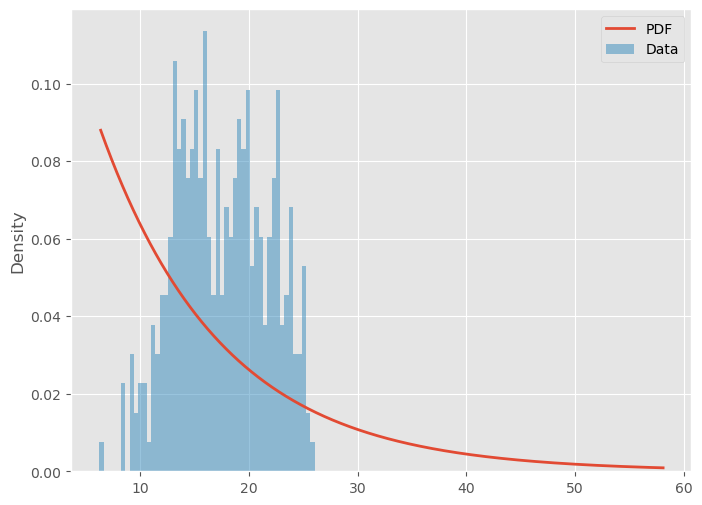

In [69]:
dist_f = st.expon
params_l = dist_f.fit(l_data)
pdf = make_pdf(dist_f, params_l)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
l_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

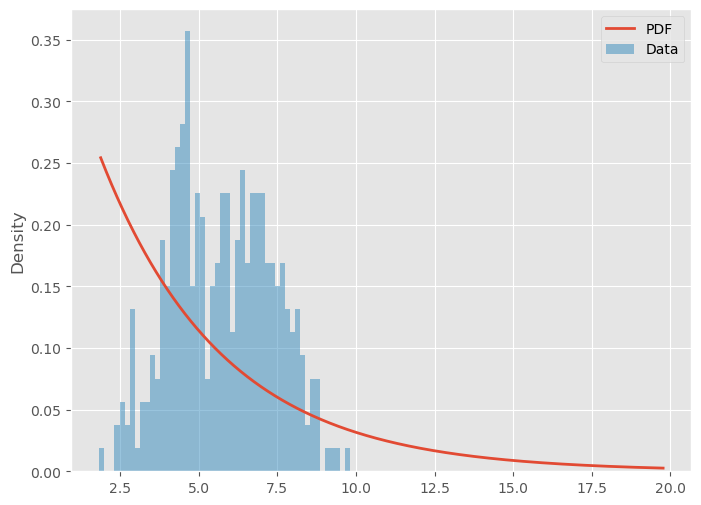

In [70]:
dist_f = st.expon
params_w = dist_f.fit(w_data)
pdf = make_pdf(dist_f, params_w)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
w_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

This isn't a great fit to our data distribution.
Lets try a skewed normal distribution:

Text(0, 0.5, 'Density')

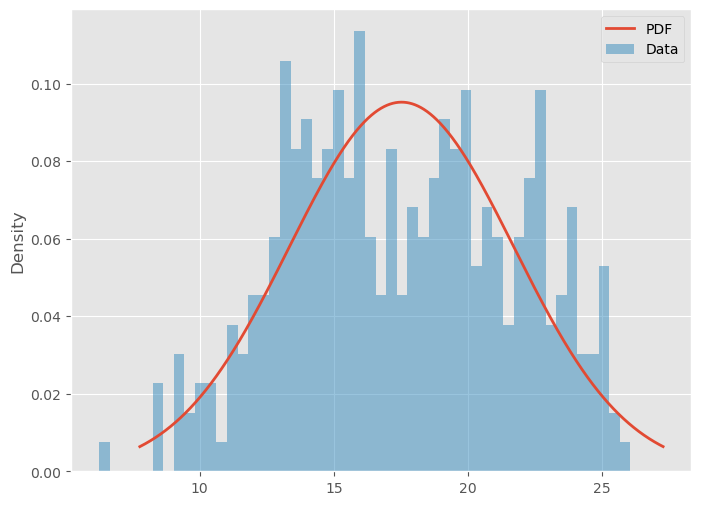

In [71]:
dist_f = st.skewnorm
params_l = dist_f.fit(l_data)
pdf = make_pdf(dist_f, params_l)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
l_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

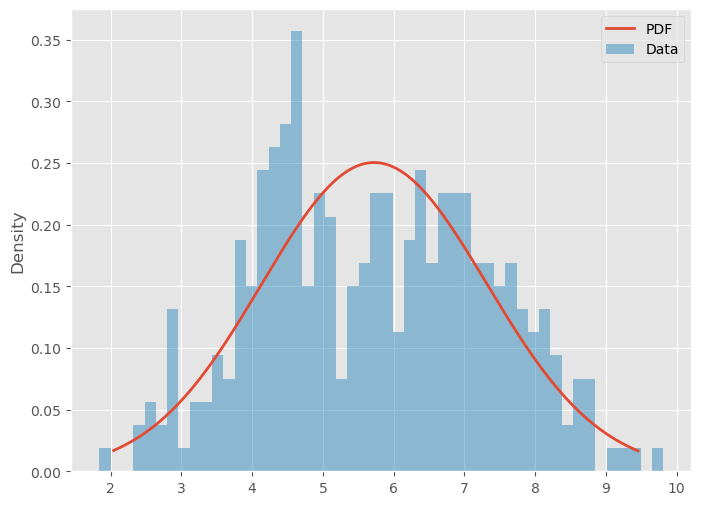

In [72]:
dist_f = st.skewnorm
params_w = dist_f.fit(w_data)
pdf = make_pdf(dist_f, params_w)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
w_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

Let's try a lognormal distribution instead:

Text(0, 0.5, 'Density')

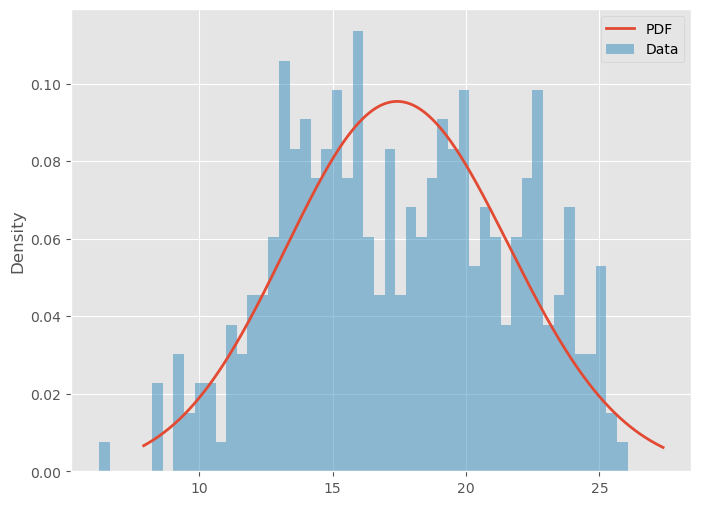

In [73]:
dist_f = st.lognorm
params_l = dist_f.fit(l_data)
pdf = make_pdf(dist_f, params_l)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
l_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

Text(0, 0.5, 'Density')

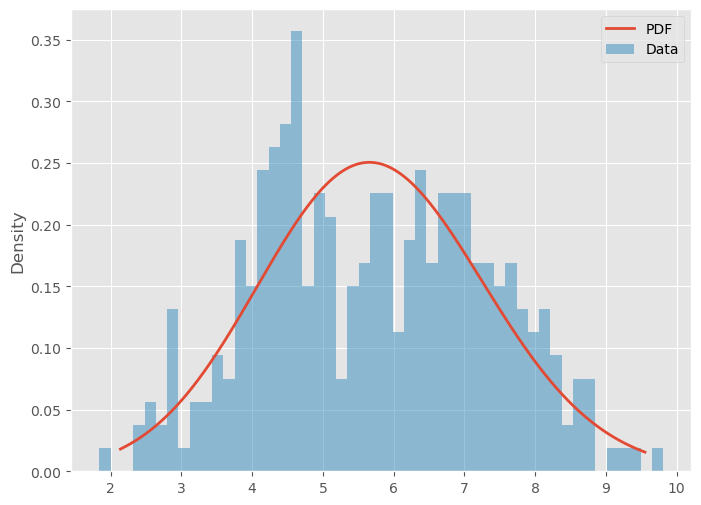

In [74]:
dist_f = st.lognorm
params_w = dist_f.fit(w_data)
pdf = make_pdf(dist_f, params_w)

plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
w_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)
ax.set_ylabel('Density')

This function is used to go through all of the distributions, calculate the probability density function for each prior distribution, then it will find the best one.

In [75]:
def best_fit_distribution(data, dist_names, bins=200, ax=None, legend=True):
    """Model data by finding best fit distribution to data"""
    #Code adapted from: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in dist_names if not d in ['levy_stable', 'studentized_range']]):
        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, legend=legend, label=distribution.name)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    return sorted(best_distributions, key=lambda x:x[2])

This function will plot all of the different distributions we want to try and fit to the data on one overlayed plot, then follow that by showing use the plot of the best fitting function:


In [76]:
def compare_and_plot_distributions(data, dist_names, legend=True):
    # Plot for comparison
    plt.figure(figsize=(8,6))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=legend)
    ax.set_ylabel('Density')

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, dist_names, 200, ax, legend)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display
    plt.figure(figsize=(8,6))
    plt.legend(loc='upper right')
    ax = pdf.plot(lw=2, label='PDF', legend=legend)
    ax.set_ylabel('Density')
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=legend, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(u'Best fit distribution \n' + dist_str)

Lets make a list of names of the distributions we used previously on the height data:

In [77]:
dist_names = ['norm', 'expon', 'skewnorm', 'lognorm']

Now lets run this cell that will display all of the different probability density functions together on one plot, then show us a seperate plot with the best fitting function.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


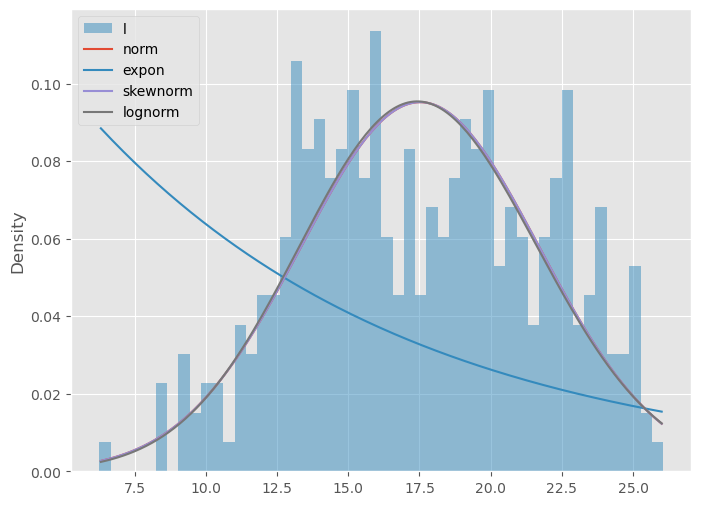

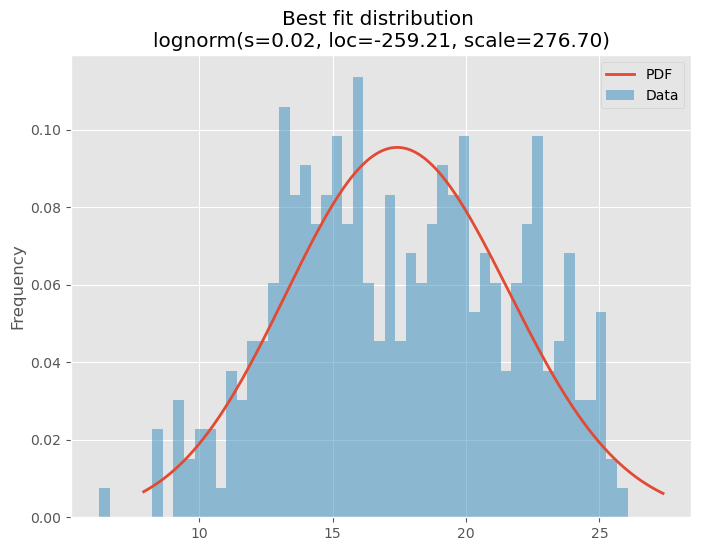

In [78]:
compare_and_plot_distributions(l_data, dist_names)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


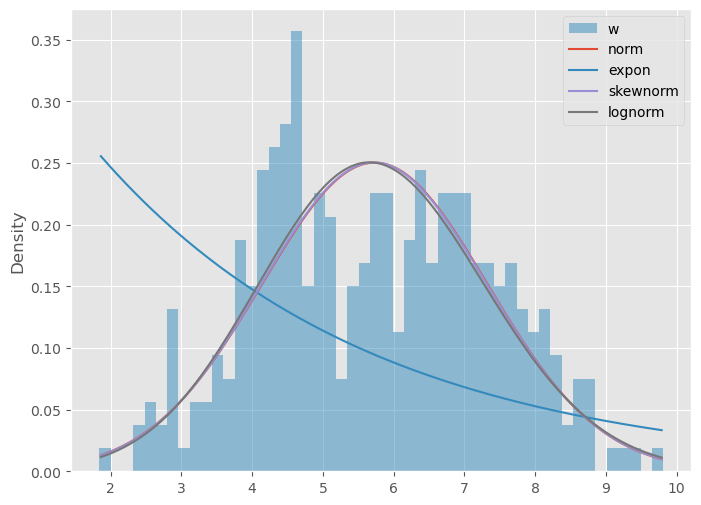

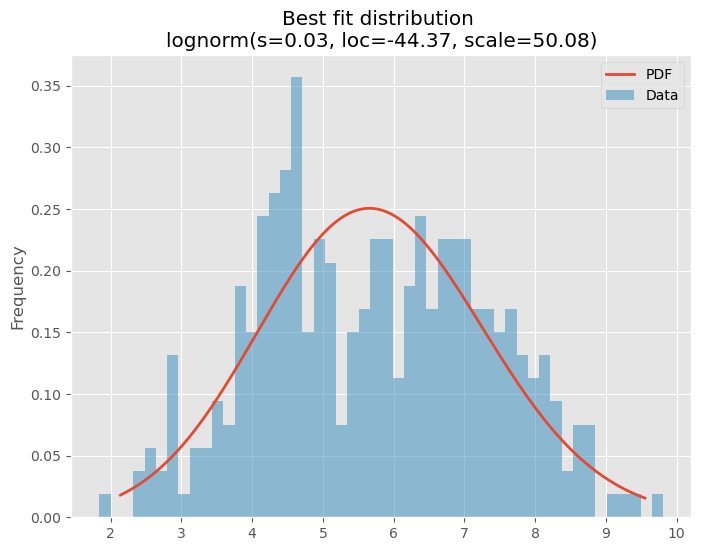

In [79]:
compare_and_plot_distributions(w_data, dist_names)

So the best fit distribution of 'l' and 'w' is lognorm.

# Small task1
Summarise them (means, ranges, distributions?)

means: 

The mean of l is: 
17.521706586826348

The mean of w is: 
5.733143712574851


ranges:
    
The range of l is: 

population

Grigorovka 2019         8.44000

Dzharylgach 2016        8.66000

Sasyk 2013             10.89000

Budakskaya spit 2017   14.17000

dtype: float64

The range of w is: 

population

Grigorovka 2019         8.44000

Dzharylgach 2016        8.66000

Sasyk 2013             10.89000

Budakskaya spit 2017   14.17000

dtype: float64


distributions:
    
The best fit distribution of 'l' and 'w' is lognorm.

# Describe any data wrangling or feature engineering that was necessary.

Data processing often involves cleaning and preprocessing data to ensure it is ready for analysis.

Handle outliers. Detect and handle possible outliers in the data. I removed the columns population, bg, rpclass, rpcolor, periodracum, these columns do not have numbers and some of them have outliers.

Data normalization. Scale or normalize the data to ensure that the data are on the same scale.

# 2. Correlation

These code refer from Introduction to Data Science Week4.

We've previously use correlation to investigate how much of relationship there is between two variables.

.stats.pearsonr()
Runs from -1 to 1 and tells us how correlated two variables are. A correlation of 0 is random (no relationship).


In [80]:
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
r

0.9568833339436237

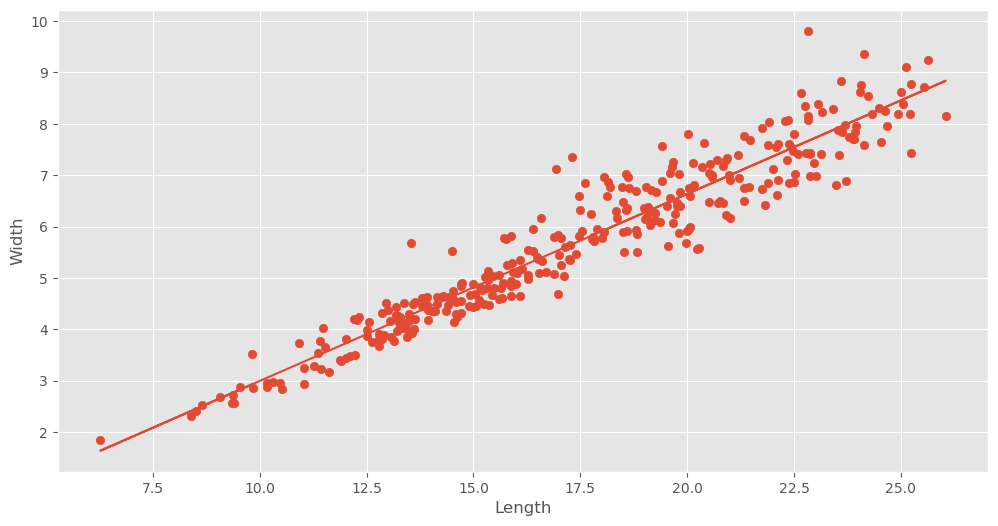

In [81]:
data = df[["l","w"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Length","Width")
ax.plot(x, model_y)

This closeness to 1 tells us that there is a pretty good correlation between the 'l' (length) and 'w' (width). The scatter plot also shows that these two variables are showing a strong linear relationship. The length of the shell and the width of the shell have a strong positive correlation. The longer the length of the shell, the wider it will be. The wider the width of the shell, the longer it will be.

# 3. Making Models

These code refer from Introduction to Data Science Week4.

So we have determined that we think there is a linear relationship between these two variables, now we'll look at how we can build a linear model to fit this relationship.

Having a model allows us to make predictions about new values
Formula of a line
We can define the function for any line in the form

y = ax + b

Where a gives us the slope of the line, and b tells us where this line intercepts the y axis



So our model will be defined completely using the formual below

y = ax + b + e

Where y is the dependent variable (surveillance), x is the independent variable (population), a and b are two parameters for us to set and e is the error.


# Least Squares Error
Similarly to when we looked at neural networks, we'll need to find value parameters (a and b) that minimise (get the lowest value of) an error function.

In the case of a linear model, we use the sum of the squared error.

1.Take the error of each point (actual y - predicted y)

2.Square (makes all the differences positive to avoid cancelling out)

3.Sum all the squared errors together

Whilst it is possible to use gradient descent to find the right values of a and b, there is actually an algebraic solution where we can just solve to find the best values!

# .stats.linregress()

And we can do that using linregress() from the scipy.stats package. This returns us a value for the slope (a) and intercept (b).

We can then plot the line, looks like a pretty good model!

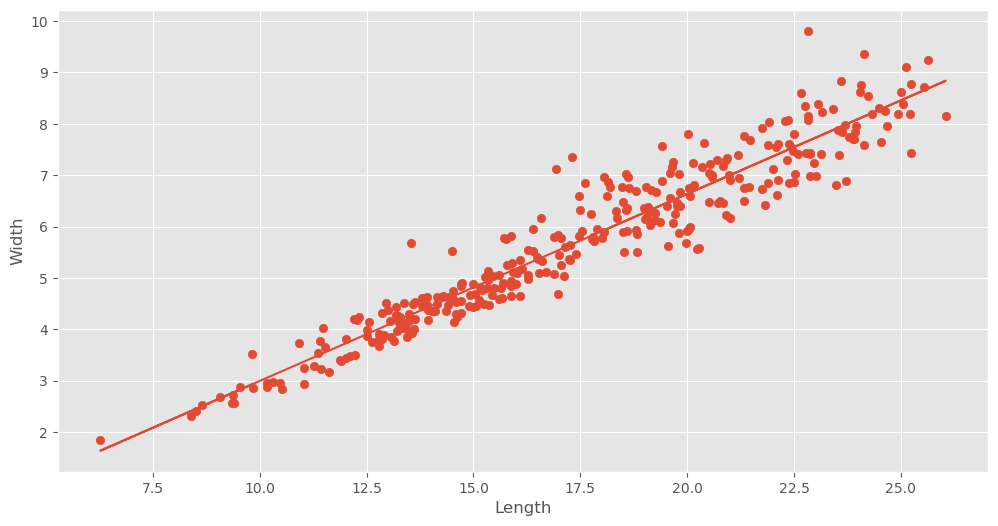

In [82]:
data = df[["l","w"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Length","Width")
ax.plot(x, model_y)

# Interpretting the Model

In [83]:
#Interpret our police model
slope, intercept

(0.3639866, -0.644523153276185)

The slope of this model is 0.3639866.

The intercept of this model is -0.644523153276185.

w (The width of the shell) = 0.36* l (The length of the shell)-0.64+error

With an intercept of -0.64 and a slope of 0.36, we can say that starting at -0.64(mm), for every 0.36(mm) growth of the length of the shell, we'd expect to see 1 more growth of the width of the shell.

If the length of the shell is 18.01(mm), I expect that the width of the shell is 5.84(mm).

# Evaluate
r^2
We use the r^2 (r squared), otherwise known as the coefficient of determination to evaluate the fit of our model. This tells us how much of the variation in the dependent variable (y) is explained by the model.

An r^2 of 1 is a perfect model and an r^2 of 0 means the model is no better than just picking the mean for every prediction.

In [84]:
#a good fit? Also known as the Coefficient of determination
r

0.9568833339436236

In [85]:
r**2

0.9156257147790642

r^2 close to 1 means the model is perfect

# p-value
We also get a p-value returned by our model, and we know that this is result of a hypothesis test.

In [86]:
p

2.5759829099234895e-180

A p-value of less than 0.05 allows us the reject the null hypothesis and conclude there is a relationship between the two variables

# Result:
    w (The width of the shell) = 0.36* l (The length of the shell)-0.64+error
    As r^2 close to 1 and A p-value of less than 0.05, this model is great fit.

# 4. Multiple Regression
y = ax1 + bx2 + cx3 + d + error

linear_model.LinearRegression()

In [87]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
car_df = pd.read_csv("/Users/liangminghao/Desktop/Donacilla.csv") 
x = car_df[['l','w']]
y = car_df['h'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y)) 

[0.37530567 0.68643472] 0.23573099307214918 0.9803909032161249


# Result

y=0.38x(l)+ 0.69x(w)+0.24

The resulting coeffients and intercept show us that from a starting point of 0.24(mm)

For every 1(mm) increase in the length of the shell, I expect the height will increase by 0.38 (mm)

AND

For every 1(mm) increase in the width of the shell, I expect the height will increase by 0.69 (mm)


# Predicting New Values, .predict()
Now we have fitted the model, we can use it to predict new values using the .predict() function.


In [88]:
regr.predict([[20,7]])

/Users/liangminghao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.54688739])

For example, length of the shell is 20.00 (mm) and the width of the shell is 7.00 (mm), I would expect that the height of the shell is 12.55 (mm). 

# 5. What ethical issues may arise from using these models to make predictions?

Biased or discriminatory predictions. If these models are based on biased or discriminatory data, they will produce biased or discriminatory predictions. For example, if the data set used to create the model is biased towards a particular demographic group or discriminates against certain groups, then the model is likely to produce biased or discriminatory predictions.

Privacy issues. These models often require large amounts of data to make accurate predictions. However, this can raise privacy issues if the data used to create the model includes personal or sensitive information.

Transparency and accountability. Interpreting and understanding the results of these models can be difficult, especially for non-specialists. It is important to ensure that the assumptions, limitations and methods of the model are clearly explained and that the model is independently validated and tested.

Inaccuracies or errors. The models may not be perfect and may produce inaccurate or incorrect predictions. This can raise ethical issues if the predictions are used to make important decisions or have a significant impact on people's lives. It is important to acknowledge the limitations of the models and to communicate the level of uncertainty associated with their predictions.

Overall, it is important to be aware of these ethical issues when using these models to make predictions and to take steps to mitigate any potential harm or negative impact on individuals or groups.

# What extra data (more variables, better variables) would improve your current models, or allow you to make better, different models?
The weight of the shell, Longevity 
I would like to know the relationship between length, width, height, weight and life expectancy.